Importing the libraries 

In [ ]:
import numpy as np
import pandas as pd


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df = pd.read_csv("water_potability.csv")
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [7]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [8]:
df.dropna(axis = 0, inplace = True)
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [9]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [10]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

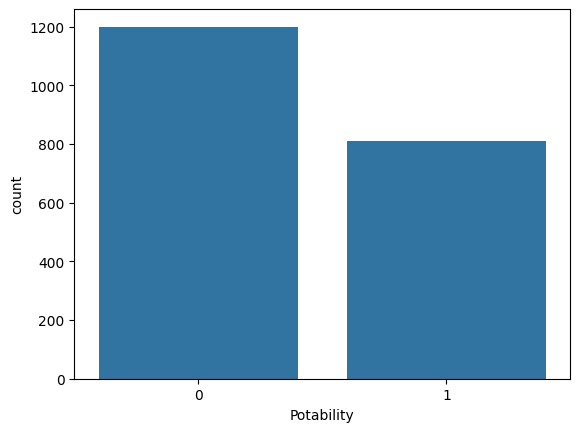

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df, x = df["Potability"])
plt.show()

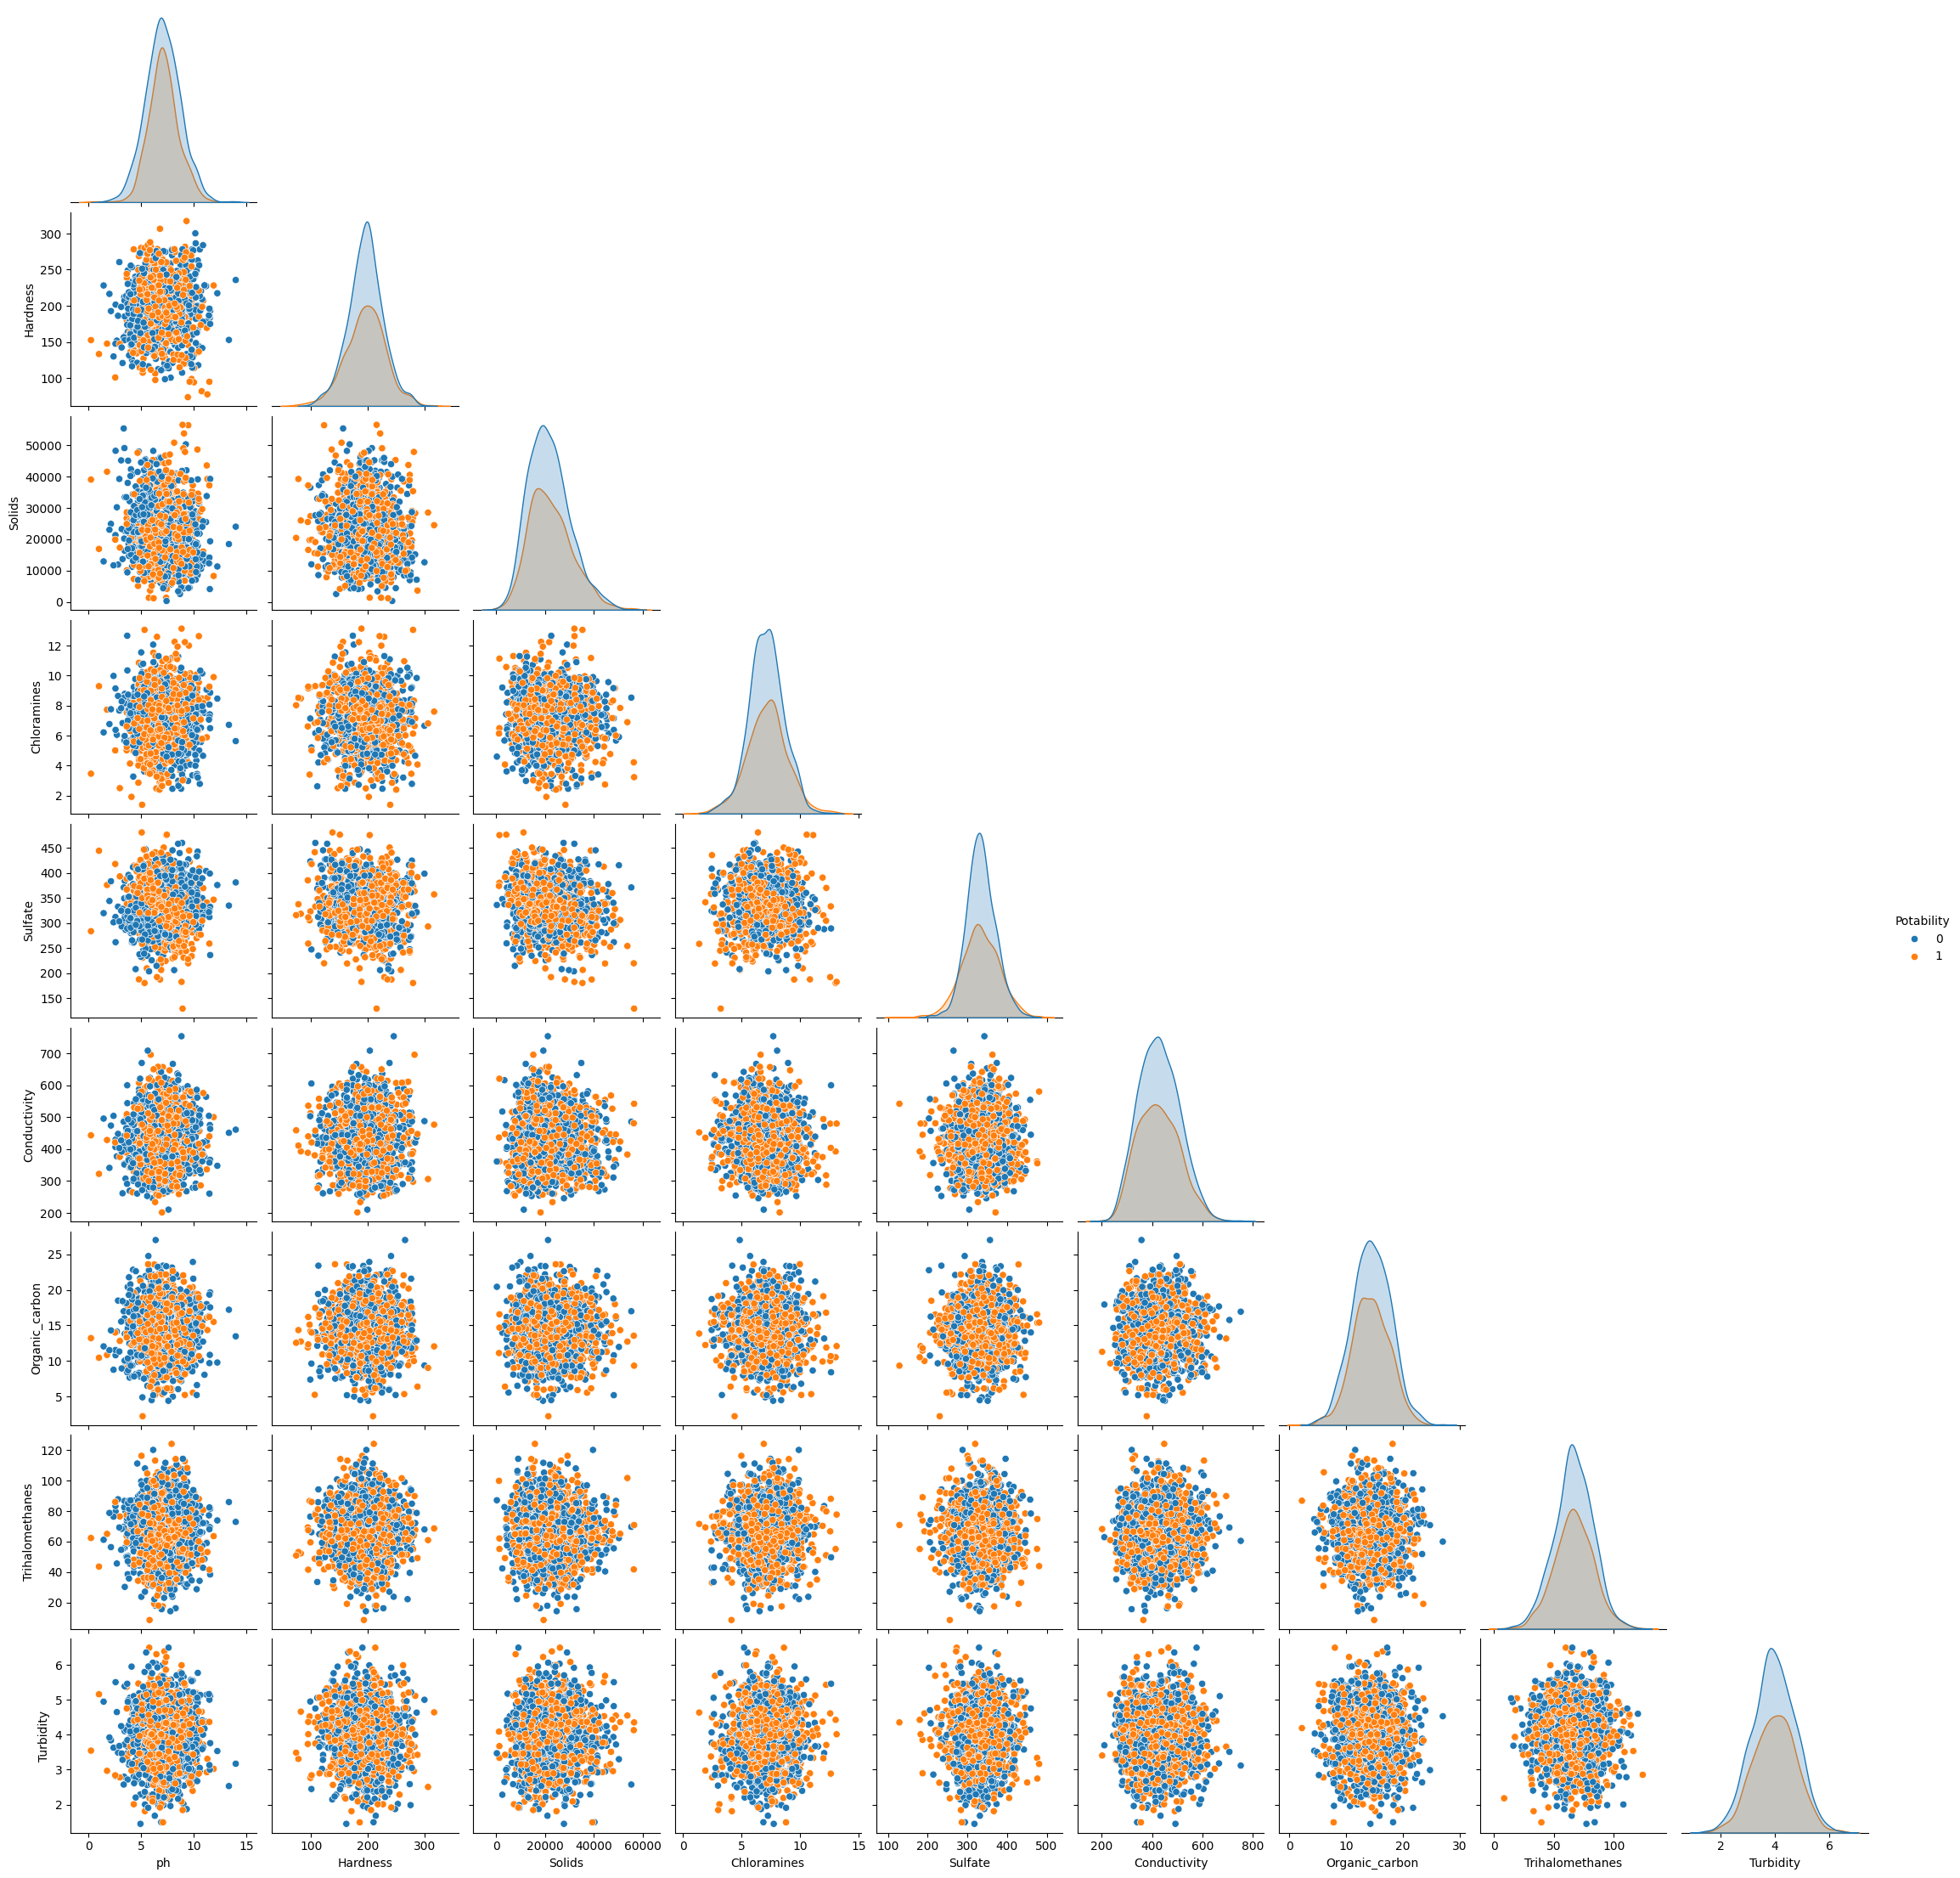

In [12]:
sns.pairplot(df, hue = "Potability", corner = True)
plt.show()

In [13]:
df_corr = df.corr()
df_corr["Potability"].sort_values(ascending = False)

Potability         1.000000
Solids             0.040674
Turbidity          0.022682
Chloramines        0.020784
ph                 0.014530
Trihalomethanes    0.009244
Hardness          -0.001505
Sulfate           -0.015303
Conductivity      -0.015496
Organic_carbon    -0.015567
Name: Potability, dtype: float64

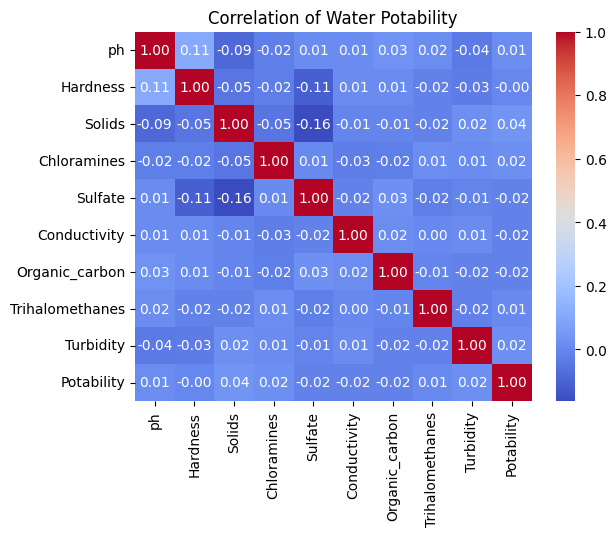

In [14]:
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True, fmt = '.2f')
plt.title("Correlation of Water Potability")
plt.show()

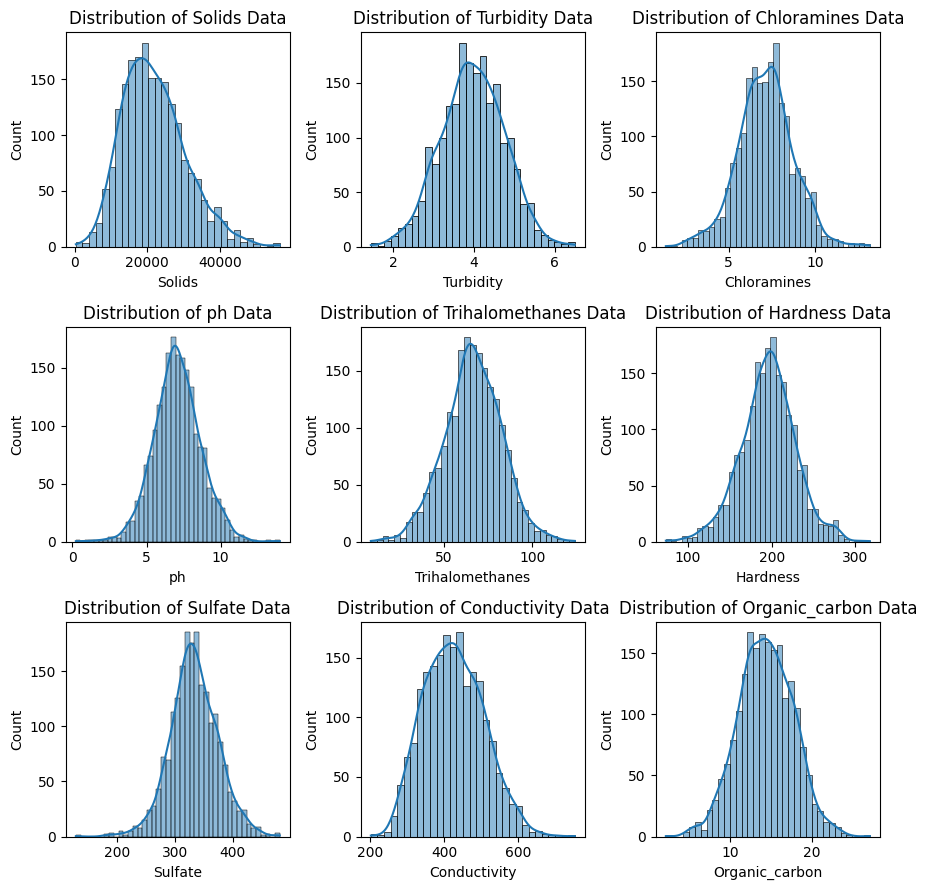

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
df_corr_pot = df_corr["Potability"].sort_values(ascending = False)
plt.figure(figsize = (9, 9))
for i, col in enumerate(df_corr_pot.index[1:], 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde = True)
    plt.title(f"Distribution of {col} Data")
    plt.tight_layout()
    plt.plot()

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df)
labels = kmeans.labels_
df_kmeans = df[labels == 1]
df_kmeans.reset_index(inplace = True)

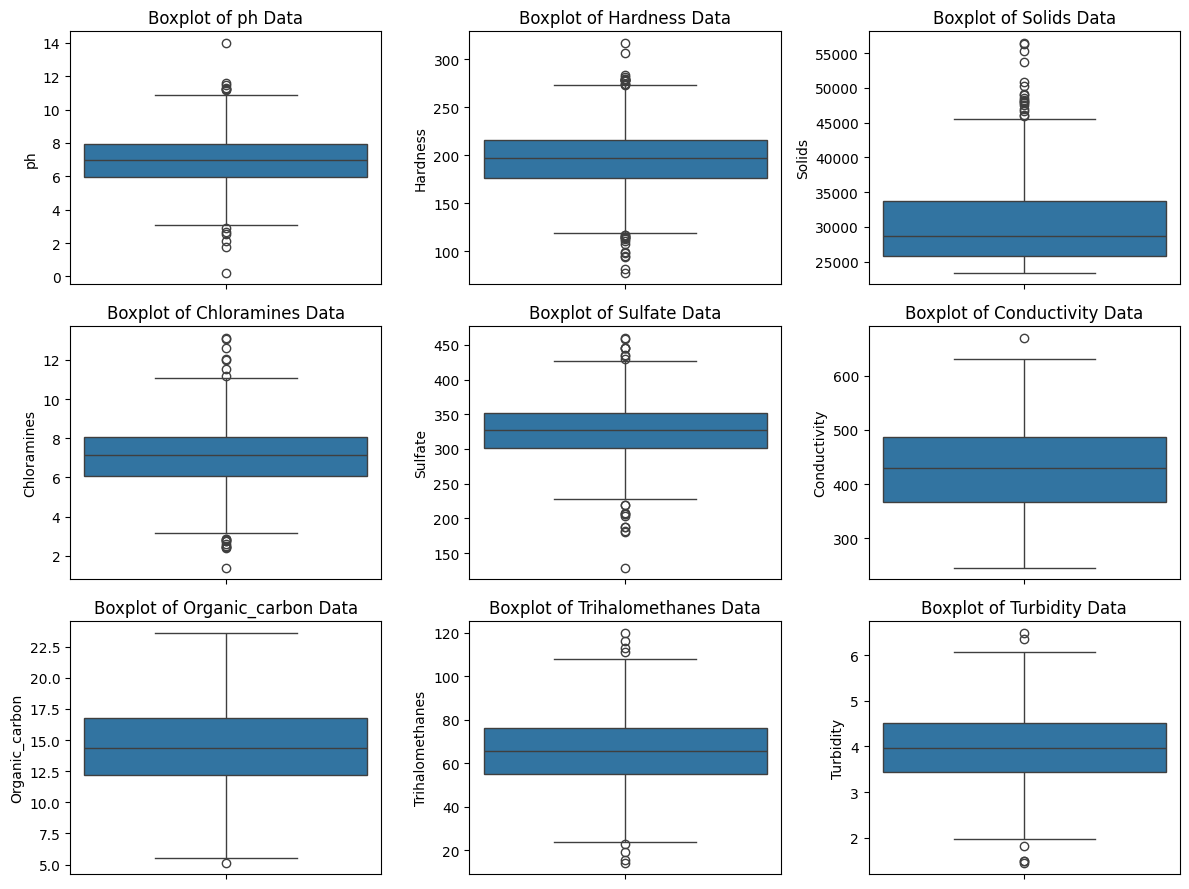

In [17]:
plt.figure(figsize = (12, 9))
for i, col in enumerate(df_kmeans.columns[1:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(df_kmeans[col])
    plt.title(f"Boxplot of {col} Data")
    plt.tight_layout()
    plt.plot()

Model training and testing

In [18]:
X = df_kmeans.iloc[:, :-1]
y = df_kmeans.iloc[:, -1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [21]:
def accuracy(X_train, X_test, y_train, y_test):
    reg = LogisticRegression()
    reg.fit(X_train, y_train)
    y_reg = reg.predict(X_test)
    
    svc = SVC()
    svc.fit(X_train, y_train)
    y_svc = svc.predict(X_test)
    
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)
    y_dtc = dtc.predict(X_test)
    
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    y_rfc = rfc.predict(X_test)
    
    gbc = GradientBoostingClassifier()
    gbc.fit(X_train, y_train)
    y_gbc = gbc.predict(X_test)
    
    abc = AdaBoostClassifier()
    abc.fit(X_train, y_train)
    y_abc = abc.predict(X_test)

    knc = KNeighborsClassifier()
    knc.fit(X_train, y_train)
    y_knc = knc.predict(X_test)
    
    return accuracy_score(y_test, y_reg), accuracy_score(y_test, y_svc), accuracy_score(y_test, y_dtc), accuracy_score(y_test, y_rfc), accuracy_score(y_test, y_gbc), accuracy_score(y_test, y_abc), accuracy_score(y_test, y_knc)

In [22]:
def precision(X_train, X_test, y_train, y_test):
    reg = LogisticRegression()
    reg.fit(X_train, y_train)
    y_reg = reg.predict(X_test)
    
    svc = SVC()
    svc.fit(X_train, y_train)
    y_svc = svc.predict(X_test)
    
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)
    y_dtc = dtc.predict(X_test)
    
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    y_rfc = rfc.predict(X_test)
    
    gbc = GradientBoostingClassifier()
    gbc.fit(X_train, y_train)
    y_gbc = gbc.predict(X_test)
    
    abc = AdaBoostClassifier()
    abc.fit(X_train, y_train)
    y_abc = abc.predict(X_test)

    knc = KNeighborsClassifier()
    knc.fit(X_train, y_train)
    y_knc = knc.predict(X_test)
    
    return precision_score(y_test, y_reg), precision_score(y_test, y_svc), precision_score(y_test, y_dtc), precision_score(y_test, y_rfc), precision_score(y_test, y_gbc), precision_score(y_test, y_abc), precision_score(y_test, y_knc)

In [23]:
def recall(X_train, X_test, y_train, y_test):
    reg = LogisticRegression()
    reg.fit(X_train, y_train)
    y_reg = reg.predict(X_test)
    
    svc = SVC()
    svc.fit(X_train, y_train)
    y_svc = svc.predict(X_test)
    
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)
    y_dtc = dtc.predict(X_test)
    
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    y_rfc = rfc.predict(X_test)
    
    gbc = GradientBoostingClassifier()
    gbc.fit(X_train, y_train)
    y_gbc = gbc.predict(X_test)
    
    abc = AdaBoostClassifier()
    abc.fit(X_train, y_train)
    y_abc = abc.predict(X_test)

    knc = KNeighborsClassifier()
    knc.fit(X_train, y_train)
    y_knc = knc.predict(X_test)
    
    return recall_score(y_test, y_reg), recall_score(y_test, y_svc), recall_score(y_test, y_dtc), recall_score(y_test, y_rfc), recall_score(y_test, y_gbc), recall_score(y_test, y_abc), recall_score(y_test, y_knc)

In [24]:
def f1(X_train, X_test, y_train, y_test):
    reg = LogisticRegression()
    reg.fit(X_train, y_train)
    y_reg = reg.predict(X_test)
    
    svc = SVC()
    svc.fit(X_train, y_train)
    y_svc = svc.predict(X_test)
    
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)
    y_dtc = dtc.predict(X_test)
    
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    y_rfc = rfc.predict(X_test)
    
    gbc = GradientBoostingClassifier()
    gbc.fit(X_train, y_train)
    y_gbc = gbc.predict(X_test)
    
    abc = AdaBoostClassifier()
    abc.fit(X_train, y_train)
    y_abc = abc.predict(X_test)

    knc = KNeighborsClassifier()
    knc.fit(X_train, y_train)
    y_knc = knc.predict(X_test)
    
    return f1_score(y_test, y_reg), f1_score(y_test, y_svc), f1_score(y_test, y_dtc), f1_score(y_test, y_rfc), f1_score(y_test, y_gbc), f1_score(y_test, y_abc), f1_score(y_test, y_knc)

In [25]:
scores = pd.DataFrame(columns = ["REG", "SVC", "DTC", "RFC", "GBC", "ABC", "KNC"],
                     index = ["ACC", "ACC_SC", "PREC", "PREC_SC", "REC", "REC_SC", "F1", "F1_SC"])
acc = [reg, svc, dtc, rfc, gbc, abc, knc] = accuracy(X_train, X_test, y_train, y_test)
scores.iloc[0, :] = acc
acc_sc = [reg, svc, dtc, rfc, gbc, abc, knc] = accuracy(X_train_sc, X_test_sc, y_train, y_test)
scores.iloc[1, :] = acc_sc
prec = [reg, svc, dtc, rfc, gbc, abc, knc] = precision(X_train, X_test, y_train, y_test)
scores.iloc[2, :] = prec
prec_sc = [reg, svc, dtc, rfc, gbc, abc, knc] = precision(X_train_sc, X_test_sc, y_train, y_test)
scores.iloc[3, :] = prec_sc
rec = [reg, svc, dtc, rfc, gbc, abc, knc] = recall(X_train, X_test, y_train, y_test)
scores.iloc[4, :] = rec
rec_sc = [reg, svc, dtc, rfc, gbc, abc, knc] = recall(X_train_sc, X_test_sc, y_train, y_test)
scores.iloc[5, :] = rec_sc
f_1 = [reg, svc, dtc, rfc, gbc, abc, knc] = f1(X_train, X_test, y_train, y_test)
scores.iloc[6, :] = f_1
f_1_sc = [reg, svc, dtc, rfc, gbc, abc, knc] = f1(X_train_sc, X_test_sc, y_train, y_test)
scores.iloc[7, :] = f_1_sc
scores

,REG,SVC,DTC,RFC,GBC,ABC,KNC
ACC,0.61875,0.5625,0.98125,0.7875,0.9875,0.9875,0.4875
ACC_SC,0.675,0.75,0.98125,0.8125,0.9875,0.9875,0.65
PREC,0.695652,0.0,0.971831,0.836364,0.972222,0.972222,0.392857
PREC_SC,0.714286,0.826087,0.971831,0.839286,0.972222,0.972222,0.616667
REC,0.228571,0.0,0.985714,0.7,1.0,1.0,0.314286
REC_SC,0.428571,0.542857,0.985714,0.657143,1.0,1.0,0.528571
F1,0.344086,0.0,0.978723,0.775194,0.985915,0.985915,0.349206
F1_SC,0.535714,0.655172,0.978723,0.784615,0.985915,0.985915,0.569231


<Axes: >

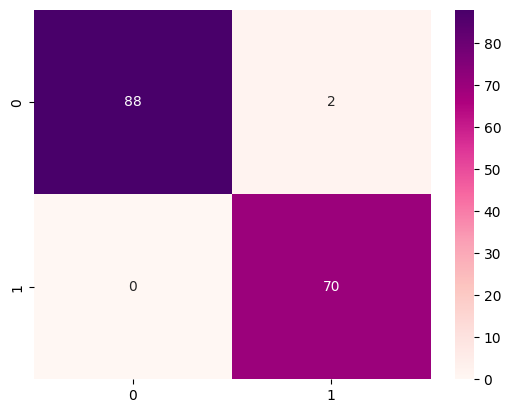

In [26]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), cmap = 'RdPu', annot = True)

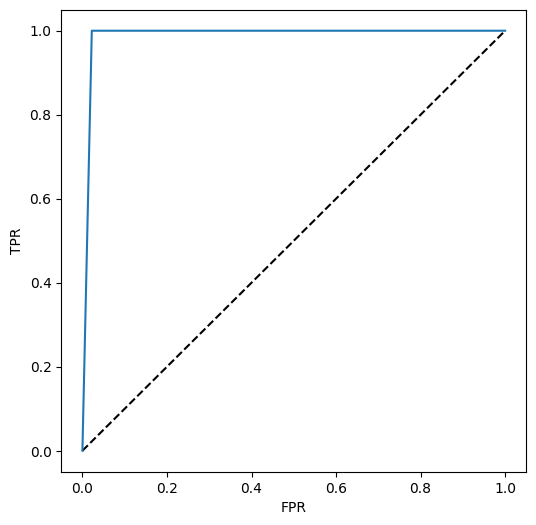

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
plt.figure(figsize = (6, 6))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = "")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [28]:
from sklearn.metrics import roc_auc_score
y_pred_prob = gbc.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred_prob)

0.9890476190476191